In [47]:
import math
import numpy as np
from IPython.display import Image, display
import pandas as pd
from scipy.special import softmax

In [9]:
BASE_DIR = "../.."

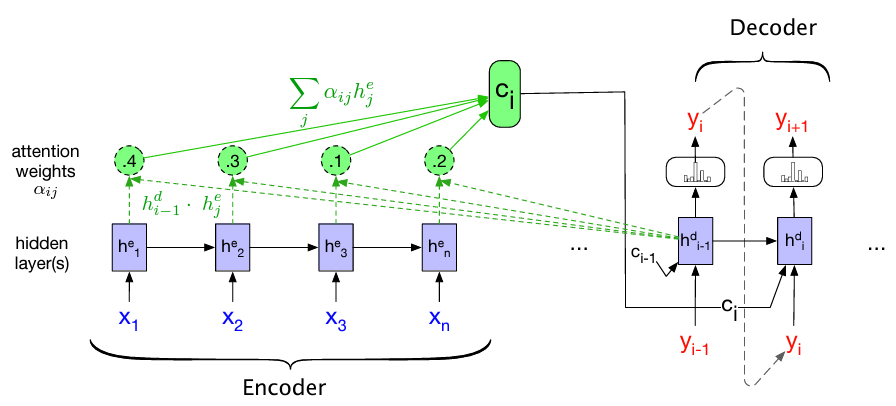

In [10]:
encoder_decoder_image = f"{BASE_DIR}/images/encoder_decoder.jpg"
display(Image(filename=encoder_decoder_image))

## Scaled Dot-Product Attention (Vaswani et al., 2017)

The attention mechanism is defined as:

$$
\alpha_{ij} = \text{softmax} \left( \frac{\text{score}(h^d_{i-1}, h^e_j)}{\sqrt{n}} \right)
$$

$$
c_i = \sum_j \alpha_{ij} \cdot h^e_j
$$

**Where:**

$$
\begin{aligned}
c_i &\quad \text{: Context vector for decoder position } i \\
\alpha_{ij} &\quad \text{: Attention weight between decoder } i \text{ and encoder } j \\
h^e_j &\quad \text{: Encoder hidden state for token } j \\
h^d_{i-1} &\quad \text{: Decoder hidden state from previous step} \\
n &\quad \text{: Dimensionality of the hidden states}
\end{aligned}
$$


The simplest such score, called dot-product attention, implements relevance as
similarity: measuring how similar the decoder hidden state is to an encoder hidden
state, by computing the dot product between them:

$$
\text{attention\_weights} = \text{score}(h^d_{i-1}, h^e_j) = h^d_{i-1} \cdot h^e_j
$$

# Question 1

In [29]:
# Tokens
this_token = [0.64, -0.27, 0.89, -0.12]
is_token = [-0.45, 0.33, 0.71, 0.08]
a_token = [0.19, -0.94, 0.56, 0.37]
translation_token = [0.03, 0.85, -0.41, 0.76]

In [30]:
h_i_e = np.array([this_token,
                  is_token,
                  a_token,
                  translation_token])

h_i_d = np.array([[0.58, -0.13, 0.94, 0.22],
                  [0.45, 0.11, -0.88, 0.67]])

attention_weights = np.array([[0.4], [0.3], [0.1], [0.2]])

In [37]:
n = h_i_d.shape

(2, 4)

In [53]:
def get_scores(matrix: np.ndarray, vector: np.ndarray) -> np.ndarray:
    return np.dot(matrix, vector)

In [45]:
def scale_scores(scores: np.ndarray, n: int) -> np.ndarray:
    return scores / np.sqrt(n)

In [40]:
def get_hidden_state_dimension(h_e, h_d):

    if h_e.ndim == 2:
        h_e_dim = h_e.shape[1]
    else:
        h_e_dim = h_e.shape[0]
    
    if h_d.ndim == 2:
        h_d_dim = h_d.shape[1]
    else:
        h_d_dim = h_d.shape[0]
    
    if h_e_dim != h_d_dim:
        raise ValueError(f"Dimension mismatch: encoder = {h_e_dim}, decoder = {h_d_dim}")
    
    return h_e_dim

In [34]:
def get_context_vector(attention_weights: np.ndarray,
                       hidden_encoder_matrix: np.ndarray) -> np.ndarray:
    
    return sum(attention_weights * h_i_e)

In [35]:
scores = get_scores(h_i_e, h_i_d[1])
scores

array([-0.6053, -0.7374, -0.2628,  0.977 ])

In [41]:
n = get_hidden_state_dimension(h_i_e, h_i_e)
n

4

In [46]:
scaled_scores = scale_scores(scores, n)
scaled_scores

array([-0.30265, -0.3687 , -0.1314 ,  0.4885 ])

In [50]:
def get_attention_weights(scores: np.ndarray) -> np.ndarray:
    return softmax(scores)

In [51]:
attention_weights = get_attention_weights(scaled_scores)
attention_weights

array([0.1876594 , 0.17566497, 0.22271181, 0.41396383])

In [52]:
context_vector = get_context_vector(attention_weights, h_i_e)
context_vector

array([ 0.07694035, -0.00526995,  0.38974566,  0.45122057])

# Question 2

In [65]:
W_Q = np.array([[0.12, -0.87, 0.33, 0.45],
                [0.76, 0.21, -0.34, 0.67],
                [-0.55, 0.18, 0.29, -0.73],
                [0.03, -0.99, 0.42, 0.11]])

W_K = np.array([[0.64, -0.27, 0.89, -0.12],
                [-0.45, 0.33, 0.71, 0.08],
                [0.19, -0.94, 0.56, 0.37],
                [0.03, 0.85, -0.41, 0.76]])

W_V = np.array([[0.58, -0.13, 0.94, 0.22],
               [-0.31, 0.66, -0.74, 0.09],
               [0.45, 0.11, -0.88, 0.67],
               [-0.92, 0.37, 0.28, -0.50]])

In [84]:
this_token_representation = [0.12, -0.87, 0.33, 0.45]
is_token_representation = [0.76, 0.21, -0.34, 0.67]
translation_token_representation = [0.03, -0.99, 0.42, 0.11] 
token_representations = np.array([this_token_representation,
                                 is_token_representation,
                                 translation_token_representation])
token_representations

array([[ 0.12, -0.87,  0.33,  0.45],
       [ 0.76,  0.21, -0.34,  0.67],
       [ 0.03, -0.99,  0.42,  0.11]])

In [86]:
n = token_representations.shape[1]
n

4

In [99]:
Q = np.expand_dims(np.dot(is_token_representation, W_Q), axis=0)
Q

array([[ 0.4579, -1.3416,  0.3622,  0.8046]])

In [100]:
Q.shape

(1, 4)

In [89]:
K = np.dot(token_representations, W_K)
K

array([[ 0.5445, -0.2472, -0.5106,  0.3801],
       [ 0.3474,  0.7532,  0.3604,  0.309 ],
       [ 0.5478, -0.6361, -0.4861,  0.1562]])

In [92]:
K.T.shape

(4, 3)

In [93]:
Q.shape

(4,)

In [90]:
V = np.dot(token_representations, W_V)
V

array([[ 0.0738, -0.387 ,  0.5922, -0.0558],
       [-0.3937,  0.2503,  1.0458, -0.3767],
       [ 0.4121, -0.5704,  0.422 ,  0.1439]])

In [109]:
attention_weights = get_attention_weights(scale_scores(np.dot(Q, K.T), n))
attention_weights

array([[0.3638497, 0.2022857, 0.4338646]])

In [110]:
single_attention_scores = np.dot(attention_weights, V)
single_attention_scores

array([[ 0.12600783, -0.33765409,  0.61011304, -0.03407072]])

# Question 3

If you have 2 heads, what would be the dimensions of $W{i}^Q , W{i}^K and Wi^V $? 

$W{i}^Q , W{i}^K and Wi^V$ = 4x4

The output of each of the h heads is of shape N×dv, and so the output of the multi-head 
layer with h heads consists of h matrices of shape N×dv

Since input sequence is "this is translation" N = 3.

Also, since we are splitting the multi-headed self-attention into 2 attention heads the dimesions are as follows per head:
$W{i}^Q , W{i}^K and Wi^V$ = N ×(dv / 2) or 3 x (4 / 2) = 3 x 2

Depending on this dimension, split the given $W^Q, W^K, W^V$ matrices so that you can compute head1 and
head2. Just show the split – you don’t have to compute the headi values.

In [116]:
def split_heads(W, n):
    d_model = W.shape[1]
    assert d_model % n == 0, "Number of heads must divide evenly into d_model"
    
    head_dim = d_model // n
    return [W[:, i*head_dim:(i+1)*head_dim] for i in range(n)]

In [118]:
W_Q

array([[ 0.12, -0.87,  0.33,  0.45],
       [ 0.76,  0.21, -0.34,  0.67],
       [-0.55,  0.18,  0.29, -0.73],
       [ 0.03, -0.99,  0.42,  0.11]])

In [119]:
W_Q_heads = split_heads(W_Q, n=2)
W_Q_heads

[array([[ 0.12, -0.87],
        [ 0.76,  0.21],
        [-0.55,  0.18],
        [ 0.03, -0.99]]),
 array([[ 0.33,  0.45],
        [-0.34,  0.67],
        [ 0.29, -0.73],
        [ 0.42,  0.11]])]

In [120]:
W_K

array([[ 0.64, -0.27,  0.89, -0.12],
       [-0.45,  0.33,  0.71,  0.08],
       [ 0.19, -0.94,  0.56,  0.37],
       [ 0.03,  0.85, -0.41,  0.76]])

In [121]:
W_K_heads = split_heads(W_K, n=2)
W_K_heads

[array([[ 0.64, -0.27],
        [-0.45,  0.33],
        [ 0.19, -0.94],
        [ 0.03,  0.85]]),
 array([[ 0.89, -0.12],
        [ 0.71,  0.08],
        [ 0.56,  0.37],
        [-0.41,  0.76]])]

In [122]:
W_V

array([[ 0.58, -0.13,  0.94,  0.22],
       [-0.31,  0.66, -0.74,  0.09],
       [ 0.45,  0.11, -0.88,  0.67],
       [-0.92,  0.37,  0.28, -0.5 ]])

In [123]:
W_V_heads = split_heads(W_V, n=2)
W_V_heads

[array([[ 0.58, -0.13],
        [-0.31,  0.66],
        [ 0.45,  0.11],
        [-0.92,  0.37]]),
 array([[ 0.94,  0.22],
        [-0.74,  0.09],
        [-0.88,  0.67],
        [ 0.28, -0.5 ]])]

What is the dimension of Concat(head1,head2)

In [127]:
np.concatenate([W_V_heads[0], W_V_heads[1]], axis=1).shape

(4, 4)

What are the dimensions of $W^O$, assuming the multi-head self-attention operation is dimension preserving, i.e., 
if you send in a T×d (T = sequence length, d is the dimension of the token representation) data matrix, you get a T×d matrix as output? 

Since we have to get the shape of the resultant data into the same dimensions as the original output we have to 
find a suitable shape of $WO∈R^hdv×d$.  In other words:

A = MultiHeadAttention(x) = ($head_{1}$,$head_{2}$,...$head_{h}$) * $W^O$

A (3x4) * (4x4)

In other words, the dimensions of $W^O$ are:
(4x4)

Based on what you have done above, what would you think are the benefits
of using multiple heads over a single head?

Using multiple heads allows for more efficient parallelization thereby reducing the amount of compute it takes to train a Language Model
that utilizes self-attention.  Thereby this also reduces the compute costs (ie. time running VM instances) as well for training the model.

There is also the benefits of more localized contextual patterns being realized when the data is broken into smaller chunks as opposed to processes sequences as a whole.